In [1]:
#! -*- coding: UTF8 -*-
import os
os.chdir(os.getcwd())

## Import Module

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [3]:
import matplotlib as mpl
%matplotlib inline
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
sns.set(font='TH Sarabun New')

## Import Data

In [4]:
df = pd.read_excel('process_data/GPP_6210501001_real.xlsx',sheet_name="Ayutthaya",index_col="Year") #ตัวอย่าง
df.head()

,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, steam and air conditioning supply","Water supply sewerage, waste management and remediation activities",Construction,Wholesale and retail trade and repair of motor vehicles,Transportation and storage,Accommodation and food service activities,Information and communication,...,การนำเข้าสินค้าและบริการ (คิดเป็น % ของจีดีพี),มูลค่าเพิ่มของอุตสาหกรรม (คิดเป็น % ของจีดีพี),จำนวนประชากรทั้งหมด (คน),ค่าใช้จ่ายในการวิจัยและพัฒนา (คิดเป็น % ของจีดีพี),รายจ่ายของประชากรในจังหวัดพระนครศรีอยุธยา (บาท),เนื้อที่ที่ถือครองเพื่อการเกษตร (ไร่),จำนวนนักท่องเที่ยวชาวไทย (คน),จำนวนนักท่องเที่ยวชาวต่างชาติ (คน),จำนวนโรงงานอุตสาหกรรม (โรงงาน),GPP Per capita (Baht)
Year,,,,,,,,,,,,,,,,,,,,,
1995,3069,471,70294,2030,254,1566,16137,1392,655,472,...,48.223830,37.278020,59467272,0.11918,12393.628934,1.141681e+06,205980,8723,178,143862.554
1996,3305,513,80942,2290,324,5205,19161,1626,819,595,...,45.255728,37.081286,60130190,0.11918,13253.421437,1.144784e+06,297246,8723,172,171503.917
1997,4056,474,86917,2697,382,1756,20641,2219,675,575,...,46.814732,36.564600,60846588,0.10214,13493.539750,1.145651e+06,322734,8723,170,179223.451
1998,4805,395,84878,3388,420,1166,22362,2306,666,585,...,42.303171,36.111727,61585103,0.17525,13536.724929,1.145807e+06,327318,10418,170,180611.806
1999,4030,302,92332,2974,503,1397,22431,2483,685,836,...,44.267746,36.378900,62298569,0.24836,13824.290188,1.146844e+06,357842,21707,168,189856.706


In [5]:
df.shape

(24, 31)

In [6]:
list1 = list(df.columns.values)

In [7]:
input_vars = list1[:-1]
len(input_vars)

30

In [8]:
input_vars

['Agriculture, forestry and fishing',
 'Mining and quarrying',
 'Manufacturing',
 'Electricity, gas, steam and air conditioning supply',
 'Water supply sewerage, waste management and remediation activities',
 'Construction',
 'Wholesale and retail trade and repair of motor vehicles',
 'Transportation and storage',
 'Accommodation and food service activities',
 'Information and communication',
 'Financial and insurance activities',
 'Real estate activities',
 'Professional, scientific and technical activities',
 'Administrative and support service activities',
 'Public administration and defence; compulsory social security',
 'Education',
 'Human health activities',
 'Arts, entertainment and recreation',
 'Other service activities',
 'การค้าสินค้า (คิดเป็น % ของจีดีพี)',
 'มูลค่าเพิ่มของการเกษตร (คิดเป็น % ของจีดีพี)',
 'การนำเข้าสินค้าและบริการ (คิดเป็น % ของจีดีพี)',
 'มูลค่าเพิ่มของอุตสาหกรรม (คิดเป็น % ของจีดีพี)',
 'จำนวนประชากรทั้งหมด (คน)',
 'ค่าใช้จ่ายในการวิจัยและพัฒนา (คิดเป็น

## Regression before Feature Selection

In [9]:
X1 = df[input_vars]
y1 = df['GPP Per capita (Baht)']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=14)
lm = LinearRegression()
lm.fit(X1_train, y1_train)
y_pred = lm.predict(X1_test)
#[np.sqrt(metrics.mean_squared_error(y1_test,y_pred)),metrics.r2_score(y1_test,y_pred)]

In [10]:
#dataframe
table1 = pd.DataFrame({'R_square': [metrics.r2_score(y1_test,y_pred)], 
                       'RMSE': [np.sqrt(metrics.mean_squared_error(y1_test,y_pred))]}, index=['Linear Regression'])
table1

,R_square,RMSE
Linear Regression,0.997546,5667.742024


## Filter Methods

#### Low Variance Filtering

In [11]:
df.var()

Agriculture, forestry and fishing                                     1.214250e+07
Mining and quarrying                                                  4.678607e+05
Manufacturing                                                         6.057976e+09
Electricity, gas, steam and air conditioning supply                   4.000911e+06
Water supply sewerage, waste management and remediation activities    3.428209e+04
Construction                                                          1.774318e+06
Wholesale and retail trade and repair of motor vehicles               7.279945e+07
Transportation and storage                                            2.360573e+07
Accommodation and food service activities                             7.159928e+05
Information and communication                                         1.847017e+05
Financial and insurance activities                                    5.661816e+06
Real estate activities                                                6.069826e+05
Prof

In [12]:
# After scanning variances from all features above, set minimum variance threshold = 15 
# Note that minimum variance threshold can be set to any value

# Below is to remove features with low variances
# Note that input_vars = a list of 35 original features
# Here, updated_vars = a list of features with variance >= minimum variance threshold

min_var_threshold = 100000000
updated_vars = [ ]
for i in range(0,len(df[input_vars].var())):

    if df[input_vars].var()[i] >= min_var_threshold:   
        updated_vars.append(df[input_vars].columns[i])
updated_vars

['Manufacturing',
 'จำนวนประชากรทั้งหมด (คน)',
 'เนื้อที่ที่ถือครองเพื่อการเกษตร (ไร่)',
 'จำนวนนักท่องเที่ยวชาวไทย (คน)',
 'จำนวนนักท่องเที่ยวชาวต่างชาติ (คน)']

In [13]:
len(updated_vars)

5

In [14]:
# Above, there are 3 features with variance >= minimum variance threshold
# Create new data frame with these 3 features and 1 output

df2 = df[updated_vars]
#df2['จำนวนประชากรทั้งหมด (คน)']=df1['จำนวนประชากรทั้งหมด (คน)']
df2.head()

,Manufacturing,จำนวนประชากรทั้งหมด (คน),เนื้อที่ที่ถือครองเพื่อการเกษตร (ไร่),จำนวนนักท่องเที่ยวชาวไทย (คน),จำนวนนักท่องเที่ยวชาวต่างชาติ (คน)
Year,,,,,
1995,70294,59467272,1.141681e+06,205980,8723
1996,80942,60130190,1.144784e+06,297246,8723
1997,86917,60846588,1.145651e+06,322734,8723
1998,84878,61585103,1.145807e+06,327318,10418
1999,92332,62298569,1.146844e+06,357842,21707


In [15]:
X = df2[updated_vars]
y = df['GPP Per capita (Baht)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=14)
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
[np.sqrt(metrics.mean_squared_error(y_test,y_pred)),metrics.r2_score(y_test,y_pred)]

[5040.5791915173895, 0.998059266116061]

#### High Correlation Filtering

<AxesSubplot:>

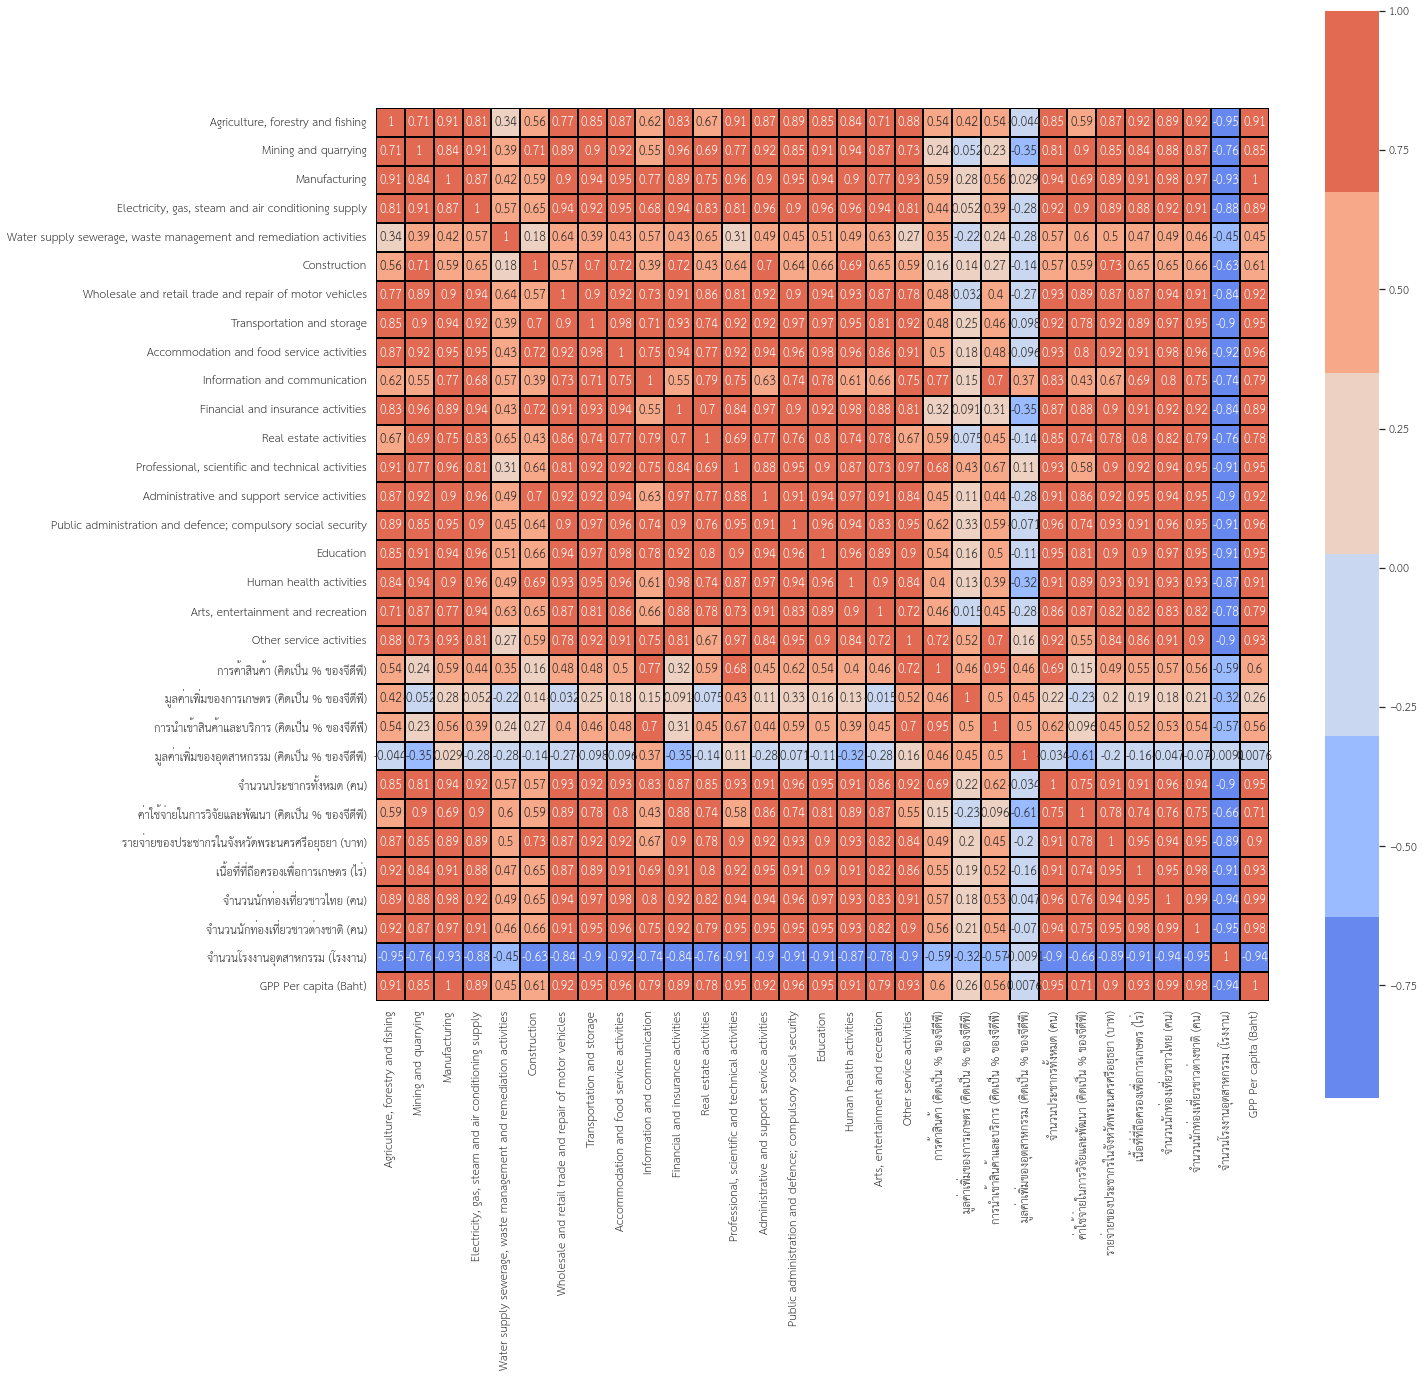

In [16]:
# Plot correlation of numerical data
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),
            square=True,
            linewidths=0.25,    
            linecolor=(0,0,0),
            cmap=sns.color_palette("coolwarm"),
            annot=True)

In [17]:
#remove high correlation Ref. https://chrisalbon.com/code/machine_learning/feature_selection/drop_highly_correlated_features/

# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.75
to_drop = [column for column in upper.columns if any(upper[column] > 0.75)]


C:\Users\pantc\AppData\Local\Temp/ipykernel_8900/2449252667.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [18]:
to_drop

['Manufacturing',
 'Electricity, gas, steam and air conditioning supply',
 'Wholesale and retail trade and repair of motor vehicles',
 'Transportation and storage',
 'Accommodation and food service activities',
 'Information and communication',
 'Financial and insurance activities',
 'Real estate activities',
 'Professional, scientific and technical activities',
 'Administrative and support service activities',
 'Public administration and defence; compulsory social security',
 'Education',
 'Human health activities',
 'Arts, entertainment and recreation',
 'Other service activities',
 'การค้าสินค้า (คิดเป็น % ของจีดีพี)',
 'การนำเข้าสินค้าและบริการ (คิดเป็น % ของจีดีพี)',
 'จำนวนประชากรทั้งหมด (คน)',
 'ค่าใช้จ่ายในการวิจัยและพัฒนา (คิดเป็น % ของจีดีพี)',
 'รายจ่ายของประชากรในจังหวัดพระนครศรีอยุธยา (บาท)',
 'เนื้อที่ที่ถือครองเพื่อการเกษตร (ไร่)',
 'จำนวนนักท่องเที่ยวชาวไทย (คน)',
 'จำนวนนักท่องเที่ยวชาวต่างชาติ (คน)',
 'จำนวนโรงงานอุตสาหกรรม (โรงงาน)',
 'GPP Per capita (Baht)']

In [19]:
len(to_drop)

25

In [20]:
not_high_corr = df.drop(to_drop,axis=1)
not_high_corr

,"Agriculture, forestry and fishing",Mining and quarrying,"Water supply sewerage, waste management and remediation activities",Construction,มูลค่าเพิ่มของการเกษตร (คิดเป็น % ของจีดีพี),มูลค่าเพิ่มของอุตสาหกรรม (คิดเป็น % ของจีดีพี)
Year,,,,,,
1995,3069,471,254,1566,9.081225,37.278020
1996,3305,513,324,5205,9.063416,37.081286
1997,4056,474,382,1756,9.064902,36.564600
1998,4805,395,420,1166,10.259227,36.111727
1999,4030,302,503,1397,8.892995,36.378900
2000,3854,255,590,1579,8.499848,36.669408
2001,4577,271,609,1572,8.579287,36.321003
2002,4704,248,545,1678,8.692178,36.894431
2003,4892,248,952,1745,9.441355,37.918175


In [21]:
X3 = not_high_corr
y3 = df["GPP Per capita (Baht)"]
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=14)
lm = LinearRegression()
lm.fit(X3_train, y3_train)
y3_pred = lm.predict(X3_test)
[np.sqrt(metrics.mean_squared_error(y3_test,y3_pred)),metrics.r2_score(y3_test,y3_pred)]

[36025.02791753557, 0.9008680256090934]

## Wrapper Methods

#### Forward Feature Selection

In [22]:
from sklearn.feature_selection import f_regression
fstat, pval = f_regression(df[input_vars], df["GPP Per capita (Baht)"])
fstat

array([1.04135703e+02, 5.49336239e+01, 5.82157526e+03, 8.63039964e+01,
       5.67551304e+00, 1.27884761e+01, 1.21854192e+02, 1.99023990e+02,
       2.76471093e+02, 3.60539343e+01, 8.81056609e+01, 3.50794632e+01,
       2.26414321e+02, 1.15133286e+02, 2.68663199e+02, 2.01172257e+02,
       1.03917365e+02, 3.71043532e+01, 1.41540547e+02, 1.23520324e+01,
       1.59097573e+00, 1.01733388e+01, 1.26794429e-03, 2.25883162e+02,
       2.21948616e+01, 9.86220947e+01, 1.30583443e+02, 8.30305922e+02,
       4.59076435e+02, 1.61354952e+02])

In [23]:
pval

array([8.33866182e-10, 2.04793246e-07, 3.62852724e-28, 4.53060255e-09,
       2.62740516e-02, 1.68579400e-03, 1.94144498e-10, 1.67648014e-12,
       6.07738448e-14, 4.82249872e-06, 3.77159778e-09, 5.83633146e-06,
       4.61206885e-13, 3.29948948e-10, 8.14281653e-14, 1.50653663e-12,
       8.50050362e-10, 3.94044910e-06, 4.68991254e-11, 1.95466017e-03,
       2.20398133e-01, 4.23485789e-03, 9.71915885e-01, 4.72239760e-13,
       1.06273113e-04, 1.36937027e-09, 1.01081440e-10, 5.76892097e-19,
       3.14333789e-16, 1.32295375e-11])

In [24]:
# Set threshold to select subset of features based on f-test statistic

# Note that input_vars = a list of 35 original features
# Here, updated_vars = a list of features selected from f-test statistic from forward feature selection

f_value_threshold = 200  # can adjust this value 
updated_vars = []
for i in range(0,len(input_vars)-1):
    if fstat[i] >= f_value_threshold:
        updated_vars.append(df[input_vars].columns[i])
updated_vars

['Manufacturing',
 'Accommodation and food service activities',
 'Professional, scientific and technical activities',
 'Public administration and defence; compulsory social security',
 'Education',
 'จำนวนประชากรทั้งหมด (คน)',
 'จำนวนนักท่องเที่ยวชาวไทย (คน)',
 'จำนวนนักท่องเที่ยวชาวต่างชาติ (คน)']

In [25]:
X = df[updated_vars]
y = df["GPP Per capita (Baht)"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=14)
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
[np.sqrt(metrics.mean_squared_error(y_test,y_pred)),metrics.r2_score(y_test,y_pred)]

[9645.867748668785, 0.9928929771747035]

#### Recursive Feature Elimination

In [26]:
from sklearn.feature_selection import RFE

X = df[input_vars]
y = df['GPP Per capita (Baht)']
n_features = 10  # define by yourself to select important features

rfe = RFE(LinearRegression(), n_features_to_select=n_features)
model = rfe.fit(X, y)

In [27]:
# rfe masks features that are selected as 1
model.ranking_

array([ 3,  1, 11,  4,  1,  8,  5,  6, 14,  1,  7, 10, 16, 12,  9, 19,  2,
        1,  1,  1,  1,  1,  1, 21, 20, 15, 13, 18, 17,  1])

In [28]:
# to obtain coefficients of features in regression model
model.estimator_.coef_

array([    94.07637778,    153.45464697,    -35.5641676 ,   -532.96133747,
           72.90727439,    878.16766094, -11353.67674318,   -328.86048609,
        12254.40309333,  -1593.98821012])

In [29]:
# Note that input_vars = a list of 35 original features
# Here, updated_vars = a list of features selected from recursive feature elimination

updated_vars = []
for i in range(0,len(input_vars)-1):
    if model.ranking_[i] == 1:
        updated_vars.append(df[input_vars].columns[i])
updated_vars

['Mining and quarrying',
 'Water supply sewerage, waste management and remediation activities',
 'Information and communication',
 'Arts, entertainment and recreation',
 'Other service activities',
 'การค้าสินค้า (คิดเป็น % ของจีดีพี)',
 'มูลค่าเพิ่มของการเกษตร (คิดเป็น % ของจีดีพี)',
 'การนำเข้าสินค้าและบริการ (คิดเป็น % ของจีดีพี)',
 'มูลค่าเพิ่มของอุตสาหกรรม (คิดเป็น % ของจีดีพี)']

In [30]:
## Perform regresssion with features selected from recursive feature elimination

X = df[updated_vars]
y = df['GPP Per capita (Baht)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=14)
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
[np.sqrt(metrics.mean_squared_error(y_test,y_pred)),metrics.r2_score(y_test,y_pred)]

# R2 using features selected from rfe is quite low
# With this data, about 27 features need to be selected to get R2 > 0.5

[42820.15694238343, 0.8599440339808766]

## Embedded Methods

#### Regression & Lasso (L1)

In [31]:
X = df[input_vars]
y = df['GPP Per capita (Baht)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=14)

In [32]:
# Perform regresssion with original 35 independent variables

lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
[np.sqrt(metrics.mean_squared_error(y_test,y_pred)),metrics.r2_score(y_test,y_pred)]

[5667.742024129134, 0.9975462785873594]

In [33]:
from sklearn.linear_model import Lasso

## Perform regresssion with embedded lasso 
## set alpha (weight of penalty term) = 1

lasso = Lasso(alpha=1)
model = lasso.fit(X_train, y_train)
y_pred = model.predict(X_test)
[np.sqrt(metrics.mean_squared_error(y_test,y_pred)),metrics.r2_score(y_test,y_pred)]

[20337.04039822369, 0.9684077464260613]

In [34]:
[model.coef_, model.intercept_]

[array([ 2.33295623e+01,  7.19594799e+01,  1.56413504e-02, -5.59605370e+00,
         4.75261845e+01,  5.60919522e+00,  2.09450555e+00,  3.21201676e+00,
        -2.70787148e+01,  5.40627677e+01, -3.29774735e+00, -2.28045287e+00,
        -4.63772076e+00,  5.88533165e+00,  1.49185650e+01, -1.39515665e+01,
         4.07492514e+00, -2.30281730e+02,  3.20075713e+01, -1.09957298e+02,
        -1.11458889e+04, -2.87188700e+02,  9.53049451e+03,  4.33991460e-03,
        -3.36070065e+03, -1.22109514e+00, -6.40723553e-01,  3.55580990e-02,
        -6.05390557e-02,  9.41923556e+02]),
 73412.61331134813]

In [35]:
##  Filter features that has non-zero coefficients and sort coefficient from min to max
##  Note that argsort returns indices of array after sort
##  At the end, coef array = non-zero coeffients, sorted from min to max
##              update_vars = names of features corresponding to coef array

index = np.argsort(model.coef_)
coef = [model.coef_[index[i]] for i in range(len(model.coef_))  if model.coef_[index[i]] != 0]
update_vars = [input_vars[index[i]] for i in range(len(model.coef_))  if model.coef_[index[i]] != 0]
coef

[-11145.888906018017,
 -3360.7006549791595,
 -287.1887004329994,
 -230.2817304005123,
 -109.95729817011892,
 -27.078714785782225,
 -13.951566507374128,
 -5.596053703877187,
 -4.6377207642434835,
 -3.297747351233011,
 -2.2804528737540903,
 -1.2210951411483542,
 -0.6407235527649163,
 -0.06053905565932745,
 0.004339914604495127,
 0.015641350390273333,
 0.03555809900150071,
 2.094505552989393,
 3.212016758349731,
 4.074925144289568,
 5.609195221075007,
 5.885331648109739,
 14.91856495500134,
 23.329562321622316,
 32.007571280451124,
 47.52618447215062,
 54.06276770948209,
 71.95947991265014,
 941.9235559169755,
 9530.494508728338]

In [36]:
update_vars

['มูลค่าเพิ่มของการเกษตร (คิดเป็น % ของจีดีพี)',
 'ค่าใช้จ่ายในการวิจัยและพัฒนา (คิดเป็น % ของจีดีพี)',
 'การนำเข้าสินค้าและบริการ (คิดเป็น % ของจีดีพี)',
 'Arts, entertainment and recreation',
 'การค้าสินค้า (คิดเป็น % ของจีดีพี)',
 'Accommodation and food service activities',
 'Education',
 'Electricity, gas, steam and air conditioning supply',
 'Professional, scientific and technical activities',
 'Financial and insurance activities',
 'Real estate activities',
 'รายจ่ายของประชากรในจังหวัดพระนครศรีอยุธยา (บาท)',
 'เนื้อที่ที่ถือครองเพื่อการเกษตร (ไร่)',
 'จำนวนนักท่องเที่ยวชาวต่างชาติ (คน)',
 'จำนวนประชากรทั้งหมด (คน)',
 'Manufacturing',
 'จำนวนนักท่องเที่ยวชาวไทย (คน)',
 'Wholesale and retail trade and repair of motor vehicles',
 'Transportation and storage',
 'Human health activities',
 'Construction',
 'Administrative and support service activities',
 'Public administration and defence; compulsory social security',
 'Agriculture, forestry and fishing',
 'Other service activities'

In [37]:
len(update_vars)

30

In [38]:
## Run another regression with lasso + alpha = 10

lasso2 = Lasso(alpha=10)
model2 = lasso2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
[np.sqrt(metrics.mean_squared_error(y_test,y_pred)),metrics.r2_score(y_test,y_pred2)]

[20337.04039822369, 0.9655264052053376]

In [39]:
[model2.coef_, model2.intercept_]

[array([ 2.29519253e+01,  7.25859918e+01,  2.76021417e-02, -6.96254002e+00,
         3.82455195e+01,  5.45011076e+00,  2.15810328e+00,  2.78559809e+00,
        -2.48982848e+01,  6.03236399e+01, -3.33901148e+00, -1.92580462e+00,
        -5.13805820e+00,  7.92005312e+00,  1.25596458e+01, -1.41220902e+01,
         5.28806659e+00, -2.21636944e+02,  3.12714363e+01,  5.75965596e+01,
        -8.21507373e+03, -4.00034343e+02,  7.84613548e+03,  4.04000285e-03,
         0.00000000e+00, -9.78493447e-01, -4.19375622e-01,  3.17190403e-02,
        -5.36718898e-02,  9.91489397e+02]),
 -141478.54359471356]

In [40]:
##  Filter features that has non-zero coefficients and sort coefficient from min to max

index = np.argsort(model2.coef_)
coef2 = [model2.coef_[index[i]] for i in range(len(model2.coef_))  if model2.coef_[index[i]] != 0]
update_vars2 = [input_vars[index[i]] for i in range(len(model2.coef_))  if model2.coef_[index[i]] != 0]
coef2

[-8215.073732617711,
 -400.0343433847962,
 -221.6369440221712,
 -24.898284753337567,
 -14.122090216784342,
 -6.962540016752504,
 -5.13805820269169,
 -3.3390114816192416,
 -1.9258046152767998,
 -0.9784934469834277,
 -0.4193756220847782,
 -0.05367188982291253,
 0.004040002852070791,
 0.027602141656035025,
 0.03171904028600337,
 2.158103284044398,
 2.7855980923017176,
 5.288066591057077,
 5.450110759505064,
 7.92005311932501,
 12.559645814019472,
 22.95192527977742,
 31.271436286104972,
 38.24551949500477,
 57.596559577266646,
 60.323639913198136,
 72.58599175556421,
 991.4893968177036,
 7846.1354787598275]

In [41]:
update_vars2

['มูลค่าเพิ่มของการเกษตร (คิดเป็น % ของจีดีพี)',
 'การนำเข้าสินค้าและบริการ (คิดเป็น % ของจีดีพี)',
 'Arts, entertainment and recreation',
 'Accommodation and food service activities',
 'Education',
 'Electricity, gas, steam and air conditioning supply',
 'Professional, scientific and technical activities',
 'Financial and insurance activities',
 'Real estate activities',
 'รายจ่ายของประชากรในจังหวัดพระนครศรีอยุธยา (บาท)',
 'เนื้อที่ที่ถือครองเพื่อการเกษตร (ไร่)',
 'จำนวนนักท่องเที่ยวชาวต่างชาติ (คน)',
 'จำนวนประชากรทั้งหมด (คน)',
 'Manufacturing',
 'จำนวนนักท่องเที่ยวชาวไทย (คน)',
 'Wholesale and retail trade and repair of motor vehicles',
 'Transportation and storage',
 'Human health activities',
 'Construction',
 'Administrative and support service activities',
 'Public administration and defence; compulsory social security',
 'Agriculture, forestry and fishing',
 'Other service activities',
 'Water supply sewerage, waste management and remediation activities',
 'การค้าสินค้า (คิดเป

In [42]:
len(update_vars2)

29

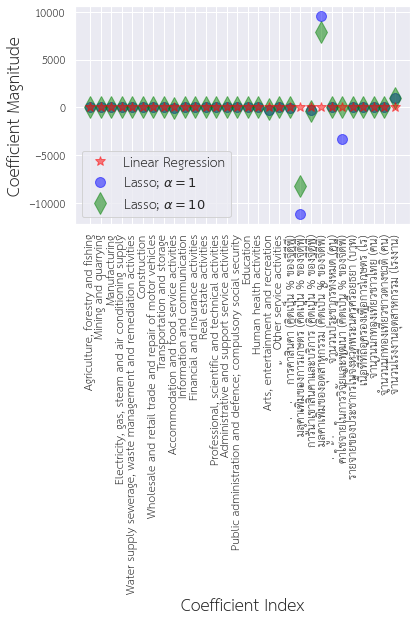

In [43]:
## Plot coefficients of linear regression model, regression with lasso + alpha=1,  regression with lasso + alpha=10
## Note that alpha parameter in plot indicates transparency of marker (it has nothing to do with alpha in lasso)

plt.plot(input_vars,lm.coef_,alpha=0.5,linestyle='none',marker='*',markersize=10,color='red',label=r'Linear Regression',zorder=7) # zorder for ordering the markers
plt.plot(input_vars,model.coef_,alpha=0.5,linestyle='none',marker='o',markersize=10,color='blue',label=r'Lasso; $\alpha = 1$') # alpha here is for transparency
plt.plot(input_vars,model2.coef_,alpha=0.5,linestyle='none',marker='d',markersize=15,color='green',label=r'Lasso; $\alpha = 10$') # alpha here is for transparency
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc='lower left')
plt.xticks(input_vars, input_vars, rotation='vertical')
plt.show()